In [33]:
# Here are all imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [34]:
# Data download from sklearn

from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])


In [35]:

#.head() function to see the first 5 records of the dataframe

df_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
# The target data frame is only one column, and it gives a list of the values 0, 1, and 2. We will
# use the information from the feature data to predict if a flower belongs in group 0, 1, or 2.
# Iris-setosa = 0
# Iris-versicolor = 1   
# Iris-virginica = 2  
# checking the df_target for first and last five records.

df_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [37]:
# concat the two DataFrames, data and target, into one dataframe as final_df

final_df = pd.concat([df_data, df_target], axis = 1)
final_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [38]:
# We need to verify the features are of which datatypes. We can use info() function to do the same. 
# We can see that all of the features except target are of float datatype and target is of 
# integer datatype

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
target          150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [39]:
# use the function .shape to find the dimensions of the dataframe. Which return a tuple value of
# rows and columns. In our Dataset we have 150 rows(records) and 5 columns(features)

final_df.shape

(150, 5)

In [40]:
# Let’s see if there are any null values present in the dataset.

final_df.isnull().any()

# # Here we can see that we don’t have any null values in our Dataset

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
target          False
dtype: bool

In [41]:
# Use describe() function to see the statistics of the dataset such as mean, median, mode, standard 
# deviation etc.

final_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [42]:
# These are some parametric and non parametric statistics of our dataset. 
# Parametric: count,mean, std, min, max. Non Parametric: 25%, 50%, 75%

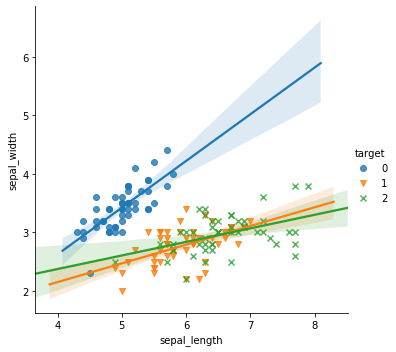

In [43]:
# Draw the scatterplots:
# Let’s see how data is distributed based on sepal_ength and sepal_width features using scatterplot.
# seaborn.lmplot is used for scatterplot. The lmplot plot shows the line along with datapoints on the 2d space

sns.lmplot(x='sepal_length',y='sepal_width', data= final_df, hue='target', markers=['o','v','x'])
plt.show()

#  used hue to show targets with different colours for better comparison . blue for 0, orange for 1
# and green for 2

In [ ]:
# Explanation: on x axis, sepal_length and on Y axis, sepal_width.
# In above plot, we have specify hue to have a categorical separation of column 'target'. Also used
# markers from the matplotlib marker symbols to seperate 3 different category of 'target'.
# Since we have three separate categories, so pass in a list of symbols while specifying the marker.

# # From above scattered plot, we can distinctly distinguish target 0, but target 1 and target 2 
# can't be distinguished based on thier sepal_width and sepal_length.

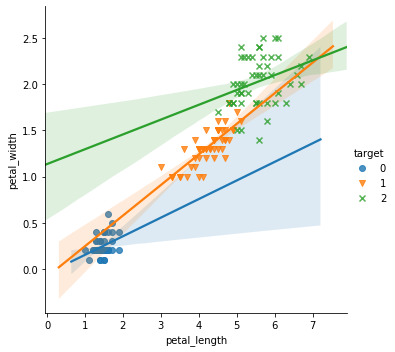

In [44]:
# Similarly scatter plot of data based on petal_ength and petal_width features

sns.lmplot(x='petal_length',y='petal_width', data= final_df, hue='target', markers=['o','v','x'])
plt.show()

In [ ]:
# From above plot, we can distinguish target 0, target 1 and target 2 based on thier petal_width 
# and petal_length. pe.tal_length and petal_width for target 1 is smaller than target 2

C:\Users\palak\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\palak\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


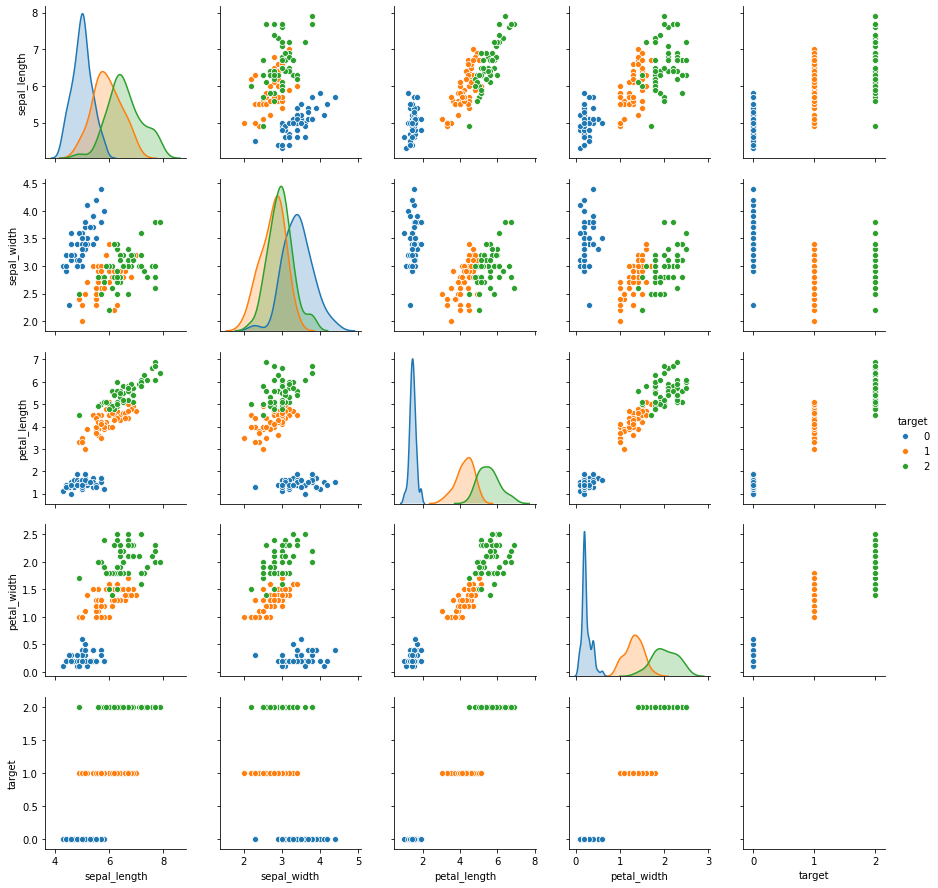

In [45]:
sns.pairplot(final_df, hue='target')

In [46]:
# Preparing data for classofication:
# prepare the feature variables x and the response Y for the fit. 
x = data
y = target

In [47]:
# import the class
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()  # instantiate the model using the default parameters

logReg.fit(x, y)  # fit the model with data

# predict the response values for the observations in x
logReg.predict(x)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
# Split the data into train and test using sklearn train_test_split function.
# The function takes a loaded dataset as input and returns the dataset split into two subsets.
#  a training set and a testing set.
# We can train the model on the training set and test the model on the testing set.
# we will splits the data into 70 for training and 30  for testing   


from sklearn.model_selection import train_test_split 
from sklearn import metrics

train, test = train_test_split(final_df, test_size = 0.3, random_state=0)

In [49]:
# use the function .shape to find the dimensions of the dataframe. Which return a tuple value of
# rows and columns.

print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [50]:
# By splitting the data, we can be train and test on different data. Response values are known for
# the testing set so we can evaluate prediction. There are 105 data as training and 45 as testing set

In [51]:
# The baseline is the probability of predicting class before the model is implemented. If the data
# is split into 3 classes evenly, there is already a 33.33 % chance of randomly assigning an element 
# to the correct class. 

final_df.target.value_counts(normalize= True)

# The baseline prediction for this is 0.3333

2    0.333333
1    0.333333
0    0.333333
Name: target, dtype: float64

In [52]:
# now creating the training and testing datasets. x will be the input, y the output

train_x=train[['sepal_length','sepal_width','petal_length','petal_width']]
train_y=train.target

test_x=test[['sepal_length','sepal_width','petal_length','petal_width']]
test_y=test.target

In [53]:
train_x.head()

,sepal_length,sepal_width,petal_length,petal_width
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


In [58]:
train_y.head()

60     1
116    2
144    2
119    2
108    2
Name: target, dtype: int32

In [59]:
test_x.head()

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [60]:
test_y.head()

114    2
62     1
33     0
107    2
7      0
Name: target, dtype: int32

In [57]:
#  import KNeighborsClassifier for classification 

In [61]:
# Fitting the data on K Neighbors Classifier with k=3. parameter n_neighbors=3 implies that we will 
# take vore from 3 nearest neighbors for feature similarity. K is a number used to identify similar 
# neighbors for the new data point.

from sklearn.neighbors import KNeighborsClassifier # Run the fit using KNeighborsClassifier from sklearn.neighbors.

model = KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x,train_y)
pred_y = model.predict(test_x)
print(metrics.accuracy_score(pred_y,test_y))

0.9777777777777777


In [27]:
# The accuracy of the KNN is 0.9777777777777777

In [28]:
#  this model is performing very well with the accuracy of the KNN is 0.9778 percent. This is much
# higher than the baseline of 33.33%

In [ ]:
# to check how our model is performing, we can look at the classification report. 
# In order to do this,  will use classification_report from sci-kit learn

#It shows the precision, recall, f1-scores and accuracy scores.

In [62]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
# Precision:  Precision in predicting group 0 and 1 is 1.0 and for group 2 is 0.92
# Recall: Number of correctly predicted group 1 out of the actual is 0.97 and for group 2 is 0.96
# F1-score: This is a harmonic mean of precision and recall. 
# The formula is F1 Score = 2* (precision * recall) / (precision + recall)
# Accuracy: Add all the correct predictions together for all classes and divide by the total number 
# of predictions. Accuracy is 0.98(98%)

# The classification report compares predictions we have made for the target variable with the real 
# classes. Our focus is on is accuracy. In this case, we have predicted 0.889(88.9%) of the classes correctly.

In [ ]:
# now changing value of k: 1, 3, 5, 7, 10, 20, 30, 40, and 50:


In [63]:
# k neighbors = 1
model = KNeighborsClassifier(n_neighbors=1) 
model.fit(train_x,train_y)
pred_y = model.predict(test_x)
print(metrics.accuracy_score(pred_y,test_y))

0.9777777777777777


In [64]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [28]:
# for k neighbors = 1,the accuracy of the KNN is 0.9777777777 and accuracy is 0.98. Is almost the same.

In [ ]:
# For k neighbors = 3 we already did above.

# now counting for another k neighbors 5,7,10,20,30,40 and 50

In [65]:
# k neighbors = 5
model = KNeighborsClassifier(n_neighbors=5) 
model.fit(train_x,train_y)
pred_y = model.predict(test_x)
print(metrics.accuracy_score(pred_y,test_y))

0.9777777777777777


In [66]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [67]:
# k neighbors = 7
model = KNeighborsClassifier(n_neighbors=7) 
model.fit(train_x,train_y)
pred_y = model.predict(test_x)
print(metrics.accuracy_score(pred_y,test_y))

0.9777777777777777


In [68]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [69]:
# k neighbors = 10
model = KNeighborsClassifier(n_neighbors=10) 
model.fit(train_x,train_y)
pred_y = model.predict(test_x)
print(metrics.accuracy_score(pred_y,test_y))

0.9777777777777777


In [70]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [71]:
# k neighbors = 20
model = KNeighborsClassifier(n_neighbors=20) 
model.fit(train_x,train_y)
pred_y = model.predict(test_x)
print(metrics.accuracy_score(pred_y,test_y))

0.9777777777777777


In [72]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [73]:
# k neighbors = 30
model = KNeighborsClassifier(n_neighbors=30) 
model.fit(train_x,train_y)
pred_y = model.predict(test_x)
print(metrics.accuracy_score(pred_y,test_y))

0.9555555555555556


In [74]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.89      0.94        18
           2       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [75]:
# k neighbors = 40
model = KNeighborsClassifier(n_neighbors=40) 
model.fit(train_x,train_y)
pred_y = model.predict(test_x)
print(metrics.accuracy_score(pred_y,test_y))

0.8888888888888888


In [76]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      0.83      0.86        18
           2       0.75      0.82      0.78        11

    accuracy                           0.89        45
   macro avg       0.88      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45



In [77]:
# k neighbors = 50
model = KNeighborsClassifier(n_neighbors=50) 
model.fit(train_x,train_y)
pred_y = model.predict(test_x)
print(metrics.accuracy_score(pred_y,test_y))

0.9111111111111111


In [78]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.89      0.89        18
           2       0.82      0.82      0.82        11

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.91      0.91      0.91        45



In [52]:
# kNN is a Distance-Based algorithm where kNN classifies data, based on proximity to K-Neighbors. 
# A small value of k means that noise will have a higher influence on the result. While a large value 
# make it computationally expensive. The lower values of kNN of model will learn to predict more
# locally. while the large values for kNN of model will learn to predict more globally.

# we can see from the above results, that as k value is increases, the accuracy is decreasing.
# upto k = 20, the accuracy is stable as 0.977777. At k=30 accuracy is decreasd at 0.955555 and 
# at k=40 is 0.888888. At k = 50 is increasing again to 0.911111.

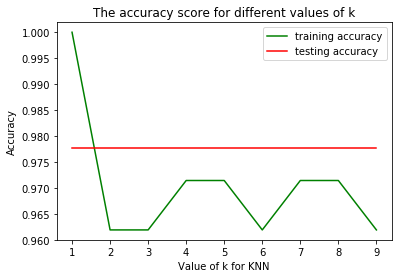

In [79]:
# Generate 10 random train/test splits for each value of k

k_range=np.arange(1,10) # return a evenly spaced values an ndarray
train_score_list=[] # create an empty list for training score
test_score_list=[]  # create an empty list for testing score

# use a for loop for various value of k
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x,train_y)
    pred_y_train=knn.predict(train_x)
    pred_y_test=knn.predict(test_x)
    
    train_score_list.append(accuracy_score(train_y,pred_y_train)) # Compute accuracy on the training set
    test_score_list.append(accuracy_score(test_y,pred_y_test)) # Compute accuracy on the testing set

# Visualization of k values vs accuracy
plt.title('The accuracy score for different values of k')    
plt.plot(k_range, train_score_list, color='g', label='training accuracy')
plt.plot(k_range, test_score_list, color='r', label='testing accuracy')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# The above visualization shows the accuracy results with respect to the k-value.
# Accuracy  is the ratio of number of correct predictions to the total number of input samples.
# The train accuracy is the accuracy of a model on examples it was constructed on. 
# The test accuracy is the accuracy of a model on examples it hasn't seen. 
# For KNN models, complexity is determined by the value of K (lower value = more complex)

# from the above plot, value for testing accuracy for various k values are remain same for k value 
# upto 10. While, training  for accuracy for k=1 is higher near the 1 and than drop to 0.96 for k=2
# and k=3.then increased fro k=4 and 5, decreased for k=6 an then repeat a pattern for k=7, 8 and 9.
